In [1]:
import pandas as pd

In [3]:
matches = pd.read_csv("matches.csv")

In [4]:
deliveries=pd.read_csv("deliveries.csv")

In [5]:
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [6]:
matches.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [10]:
matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [11]:
matches.describe()

,id,result_margin,target_runs,target_overs
count,1.095000e+03,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,17.259294,165.684066,19.759341
std,3.677402e+05,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483315e+05,6.000000,146.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000
75%,1.254062e+06,20.000000,187.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000


In [21]:
matches['winner'].value_counts().head(5)

winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    116
Rajasthan Royals               112
Name: count, dtype: int64

In [29]:
matches['loser']= matches.apply(
    lambda row: row['team1'] if row['team2']== row['winner']
    else row['team2'] if row['team1'] == row['winner']
    else None,
    axis=1
)

In [30]:
matches['loser'].value_counts().head(3)

loser
Royal Challengers Bangalore    121
Kolkata Knight Riders          120
Mumbai Indians                 117
Name: count, dtype: int64

In [31]:
matches['toss_winner'].value_counts().head(5)

toss_winner
Mumbai Indians                 143
Kolkata Knight Riders          122
Chennai Super Kings            122
Rajasthan Royals               120
Royal Challengers Bangalore    113
Name: count, dtype: int64

In [32]:
matches['toss_win_match_win']= matches['toss_winner']==matches['winner']

In [34]:
matches['toss_win_match_win'].value_counts()

toss_win_match_win
True     554
False    541
Name: count, dtype: int64

In [65]:
deliveries['batter'].value_counts().head(10)


batter
V Kohli       6236
S Dhawan      5483
RG Sharma     5183
DA Warner     4849
SK Raina      4177
MS Dhoni      3947
RV Uthappa    3927
AM Rahane     3858
KD Karthik    3687
KL Rahul      3578
Name: count, dtype: int64

In [47]:
Kohli=deliveries[deliveries['batter']=='V Kohli']

In [62]:
total_runs=Kohli['batsman_runs'].sum()
total_balls=Kohli.shape[0]
strike_rate=(total_runs/total_balls) * 100
print(f"Virat Kohli's Strike Rate :{strike_rate:2f}")

Virat Kohli's Strike Rate :128.511867


In [64]:
ABD=deliveries[deliveries ['batter']=='AB de Villiers']
total_runs=ABD['batsman_runs'].sum()
total_balls=ABD.shape[0]
strike_rate=(total_runs/total_balls) * 100
print(f"ABD's Strike Rate :{strike_rate:2f}")

ABD's Strike Rate :148.580442


In [68]:
valid_dismissals = ['bowled', 'caught', 'lbw', 'stumped', 'caught and bowled', 'hit wicket']
bowler_wickets = deliveries[deliveries['dismissal_kind'].isin(valid_dismissals)]
bowler_wickets.groupby('bowler')['player_dismissed'].count().sort_values(ascending=False).head(10)


bowler
YS Chahal     205
PP Chawla     192
DJ Bravo      183
B Kumar       181
SP Narine     180
R Ashwin      180
A Mishra      174
SL Malinga    170
JJ Bumrah     168
RA Jadeja     160
Name: player_dismissed, dtype: int64

In [69]:
# Total balls bowled
balls_bowled = deliveries.groupby('bowler').count()['ball']

# Total wickets taken
wickets_taken = bowler_wickets.groupby('bowler').count()['player_dismissed']

# Combine into a DataFrame
bowling_sr = pd.DataFrame({
    'balls_bowled': balls_bowled,
    'wickets': wickets_taken
})

# Drop bowlers with fewer than 200 balls
bowling_sr = bowling_sr[bowling_sr['balls_bowled'] >= 200]

# Calculate strike rate
bowling_sr['strike_rate'] = bowling_sr['balls_bowled'] / bowling_sr['wickets']

# Best strike rates (lowest first)
bowling_sr.sort_values(by='strike_rate').head(10)


,balls_bowled,wickets,strike_rate
bowler,,,
Sohail Tanvir,265,22.0,12.045455
L Ngidi,342,25.0,13.680000
BJ Hodge,238,17.0,14.000000
CRD Fernando,249,17.0,14.647059
A Zampa,425,29.0,14.655172
Akash Madhwal,279,19.0,14.684211
M Pathirana,503,34.0,14.794118
YA Abdulla,222,15.0,14.800000
A Ashish Reddy,270,18.0,15.000000


In [70]:
# Total runs conceded
runs_conceded = deliveries.groupby('bowler')['total_runs'].sum()

# Overs = balls_bowled / 6
bowling_sr['runs_conceded'] = runs_conceded
bowling_sr['overs'] = bowling_sr['balls_bowled'] / 6

# Economy = runs / overs
bowling_sr['economy'] = bowling_sr['runs_conceded'] / bowling_sr['overs']

# Best economy (lowest first)
bowling_sr.sort_values(by='economy').head(10)


,balls_bowled,wickets,strike_rate,runs_conceded,overs,economy
bowler,,,,,,
Sohail Tanvir,265,22.0,12.045455,275,44.166667,6.226415
A Chandila,234,11.0,21.272727,245,39.000000,6.282051
SM Pollock,280,11.0,25.454545,307,46.666667,6.578571
A Kumble,983,45.0,21.844444,1089,163.833333,6.646999
GD McGrath,329,12.0,27.416667,366,54.833333,6.674772
M Muralitharan,1581,64.0,24.703125,1765,263.500000,6.698292
J Yadav,398,8.0,49.750000,447,66.333333,6.738693
SP Narine,4146,180.0,23.033333,4672,691.000000,6.761216
RE van der Merwe,455,21.0,21.666667,515,75.833333,6.791209


In [71]:
bowling_sr[['wickets', 'strike_rate', 'economy']].sort_values(by='wickets', ascending=False).head(10)


,wickets,strike_rate,economy
bowler,,,
YS Chahal,205.0,17.697561,7.741455
PP Chawla,192.0,20.286458,7.977920
DJ Bravo,183.0,18.010929,8.075243
B Kumar,181.0,22.430939,7.464532
R Ashwin,180.0,25.994444,6.969438
SP Narine,180.0,23.033333,6.761216
A Mishra,174.0,19.793103,7.304878
SL Malinga,170.0,17.494118,7.032952
JJ Bumrah,168.0,18.958333,7.233909


In [72]:
import seaborn as sns

In [73]:
import matplotlib.pyplot as plt

/var/folders/dh/6lwkx0l90tz3dvbqfhcww_540000gq/T/ipykernel_5771/3219668413.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_teams.index, y=top_teams.values, palette='viridis')


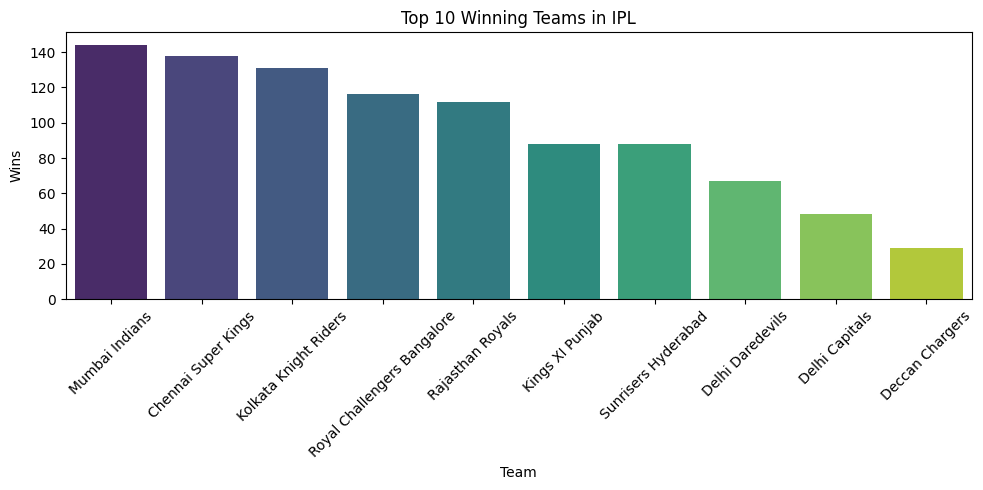

In [74]:
top_teams=matches['winner'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_teams.index, y=top_teams.values, palette='viridis')
plt.title("Top 10 Winning Teams in IPL")
plt.xlabel("Team")
plt.ylabel("Wins")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/dh/6lwkx0l90tz3dvbqfhcww_540000gq/T/ipykernel_5771/1986055386.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=matches, x='toss_decision', palette='pastel')


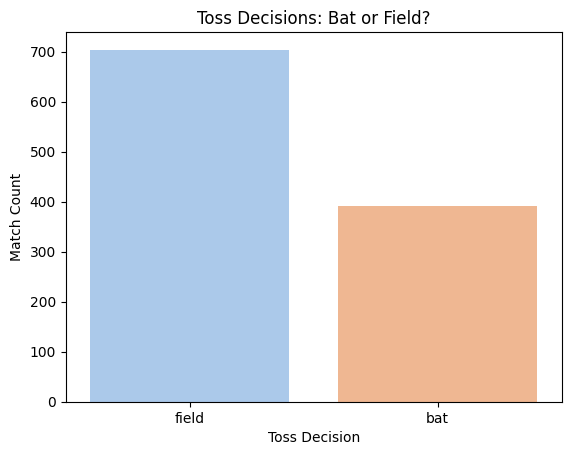

In [75]:
sns.countplot(data=matches, x='toss_decision', palette='pastel')
plt.title("Toss Decisions: Bat or Field?")
plt.xlabel("Toss Decision")
plt.ylabel("Match Count")
plt.show()


/var/folders/dh/6lwkx0l90tz3dvbqfhcww_540000gq/T/ipykernel_5771/3537321142.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_players.index, y=top_players.values, palette='Set2')


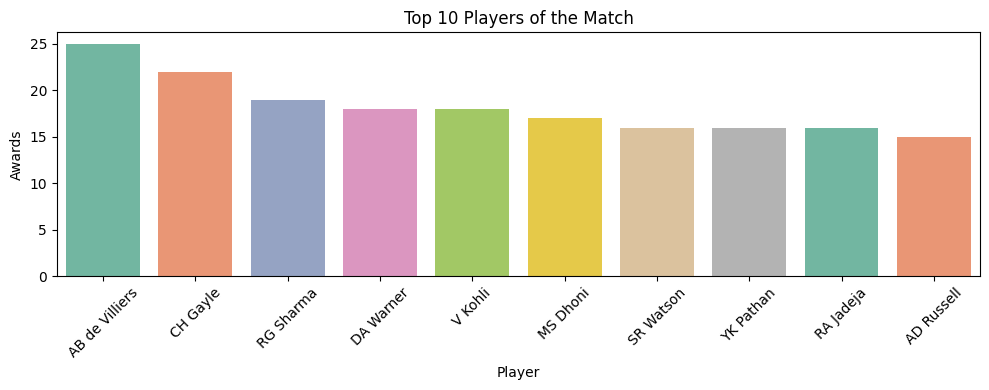

In [76]:
top_players = matches['player_of_match'].value_counts().head(10)

plt.figure(figsize=(10, 4))
sns.barplot(x=top_players.index, y=top_players.values, palette='Set2')
plt.title("Top 10 Players of the Match")
plt.xlabel("Player")
plt.ylabel("Awards")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/dh/6lwkx0l90tz3dvbqfhcww_540000gq/T/ipykernel_5771/1638601458.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bowling_sr_filtered.index, y=bowling_sr_filtered['economy'], palette='magma')


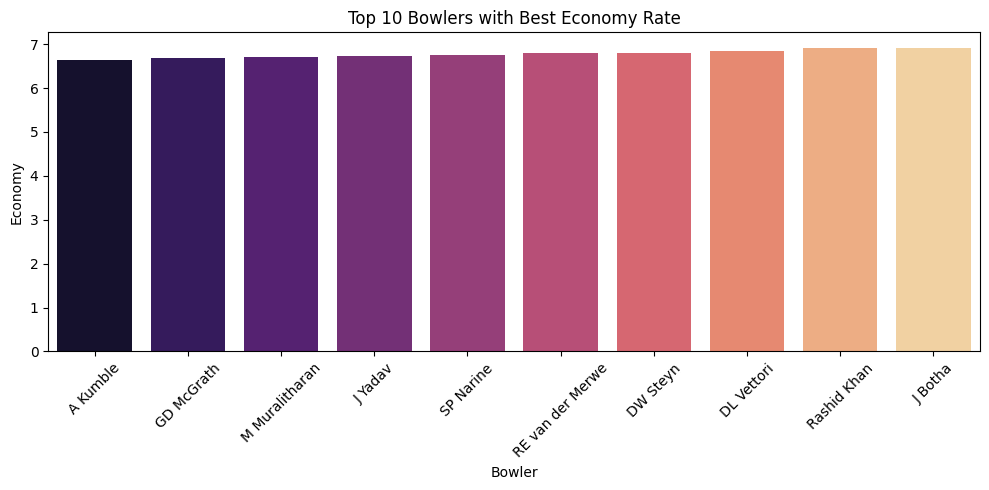

In [79]:
bowling_sr_filtered = bowling_sr[bowling_sr['balls_bowled'] >= 300].sort_values('economy').head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=bowling_sr_filtered.index, y=bowling_sr_filtered['economy'], palette='magma')
plt.title("Top 10 Bowlers with Best Economy Rate")
plt.xlabel("Bowler")
plt.ylabel("Economy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
